In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
cancer_df.shape

(569, 30)

In [12]:
X= cancer_df
y=cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)

In [14]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.10090,0.29200,0.247700,0.087370,0.4677,0.07623
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.458900,0.172700,0.3000,0.08701
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.088030,0.043060,0.3200,0.06576
285,12.58,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.125500,0.083120,0.2744,0.07238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.041580,0.031250,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.212300,0.098610,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.016740,0.026800,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.179100,0.107000,0.3110,0.07592


In [15]:
X_train.shape

(426, 30)

In [16]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
y_train

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

In [18]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.10090,0.29200,0.247700,0.087370,0.4677,0.07623
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.458900,0.172700,0.3000,0.08701
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.088030,0.043060,0.3200,0.06576
285,12.58,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.125500,0.083120,0.2744,0.07238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.041580,0.031250,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.212300,0.098610,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.016740,0.026800,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.179100,0.107000,0.3110,0.07592


In [21]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)
lreg_y_pred=lreg.predict(X_test)
lreg_y_pred

array([ 0.62604245,  0.63104065,  0.97509934, -0.67504765,  0.65004574,
        0.05395955,  0.88287273,  1.04127316,  0.85665807,  0.87331225,
        0.34727058,  0.70585365,  0.59214227,  0.6404029 ,  0.82472983,
        0.25363049,  0.93156657,  1.12309923,  0.71166227, -0.21599275,
        0.92101435,  1.07843823,  0.92187563,  1.16463609,  0.68449589,
        0.01582819,  0.98050345,  0.89495079,  0.24086096,  0.23878385,
        0.67691617,  0.80199891,  0.9494426 ,  0.19657211, -0.07433123,
        0.9251813 ,  1.03710999,  0.69012055,  1.12874965,  1.04366851,
       -0.81208898,  0.41104353,  1.09781263,  0.93199467,  0.28274596,
        0.90033939,  1.18022515,  0.92541254,  0.42886124,  0.1329966 ,
        0.93011215,  0.60974197,  0.60978027,  0.91322095,  1.07655142,
        0.48763671,  0.91359967,  1.06456157, -0.32089905,  0.94549162,
        0.64125451,  0.25860055,  1.03114748, -0.24197434,  0.29803753,
        0.9358526 , -0.05264376,  0.27058521,  0.75115723,  0.39

In [22]:
lreg.score(X_train,y_train)

0.7816413146111393

In [23]:
lreg.score(X_test,y_test)

0.7146729691229157

In [24]:
from sklearn import metrics
print('MSE',metrics.mean_squared_error(y_test,lreg_y_pred))

MSE 0.06797952439890237


In [26]:
# Calculating Manually
mean_squared_error=np.mean((lreg_y_pred - y_test)**2)
print("Mean_squared_error Of the test Dataset is :",mean_squared_error)

Mean_squared_error Of the test Dataset is : 0.06797952439890237


In [33]:
lreg_coefficient =pd.DataFrame()
lreg_coefficient["column"]=X_train.columns
lreg_coefficient["Coefficient Estimate"]=pd.Series(lreg.coef_)
print(lreg_coefficient)

                     column  Coefficient Estimate
0               mean radius              0.138897
1              mean texture             -0.007492
2            mean perimeter             -0.000838
3                 mean area             -0.000782
4           mean smoothness             -2.059333
5          mean compactness              6.644798
6            mean concavity             -2.698014
7       mean concave points             -3.133461
8             mean symmetry             -0.522312
9    mean fractal dimension             -4.403725
10             radius error             -0.300848
11            texture error             -0.009660
12          perimeter error              0.043881
13               area error              0.000076
14         smoothness error            -13.467351
15        compactness error             -0.129805
16          concavity error              3.990257
17     concave points error            -10.062304
18           symmetry error             -3.761581


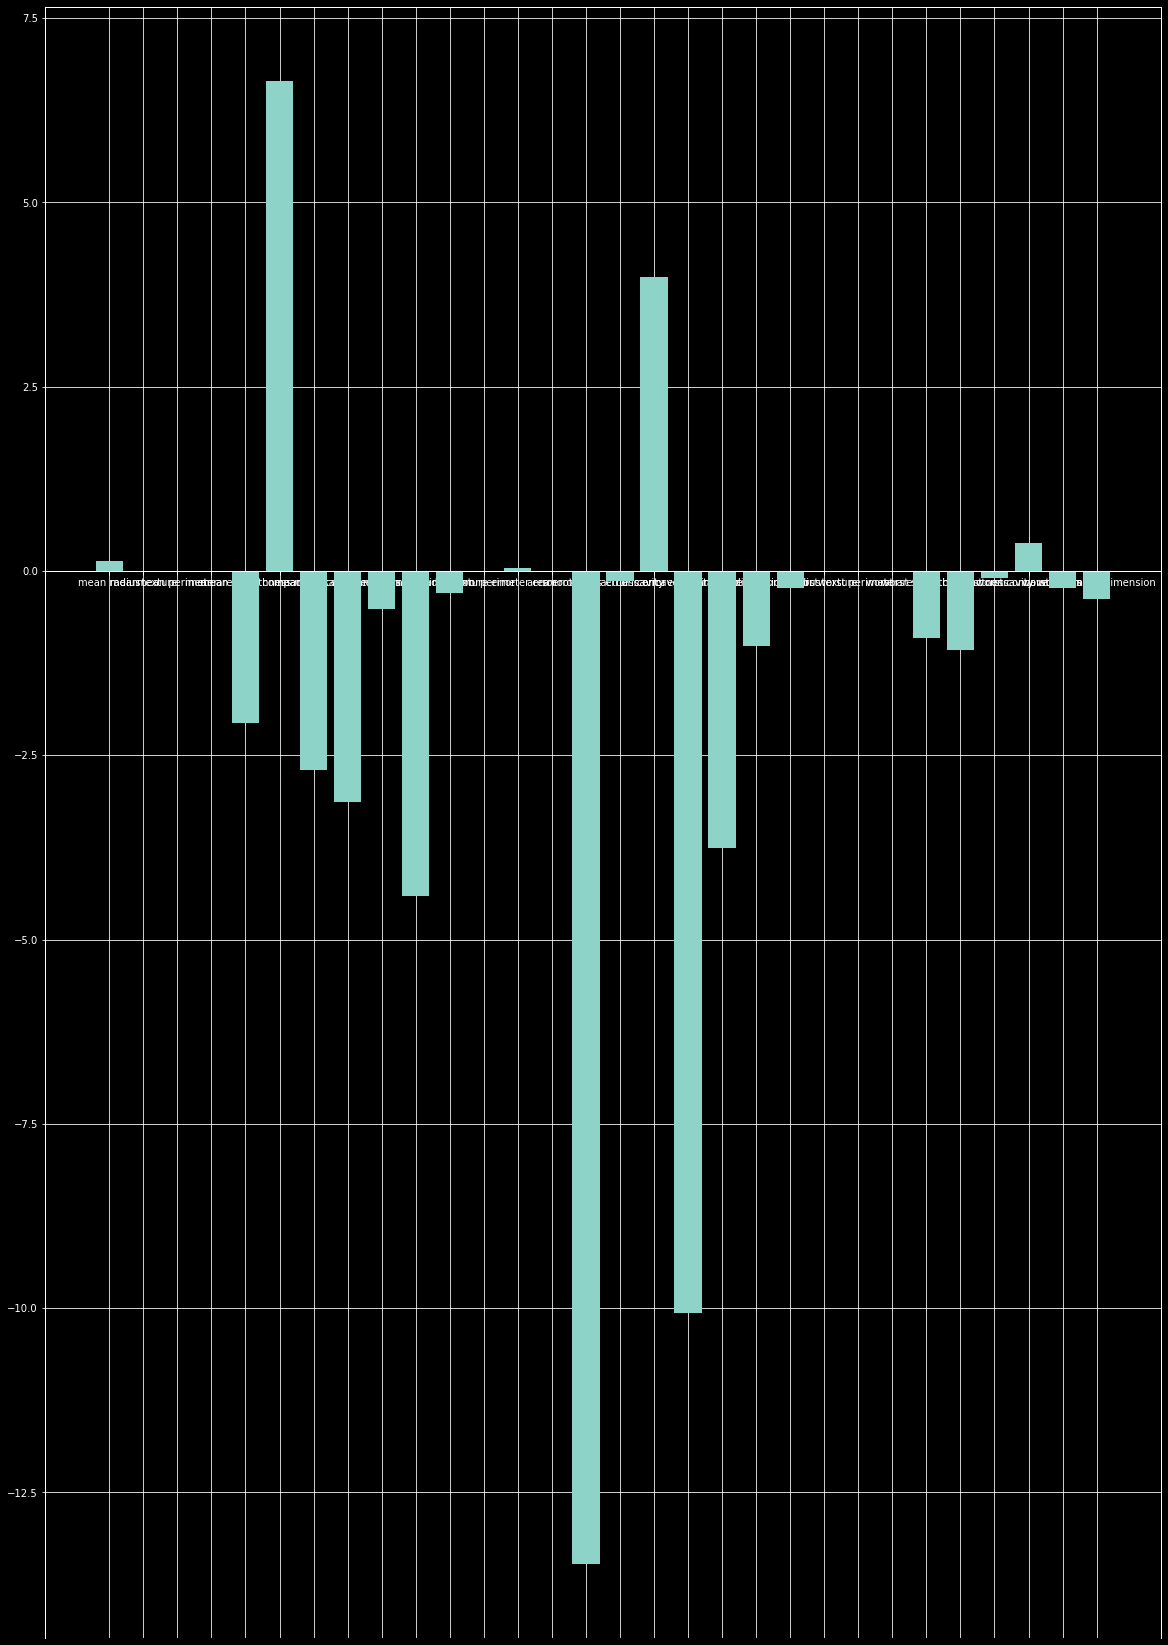

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [43]:
fig,ax = plt.subplots(figsize=(20,30))
ax.bar(lreg_coefficient['column'],lreg_coefficient['Coefficient Estimate'])
ax.spines['bottom'].set_position('zero')
plt.style.use('dark_background')
plt.show()
plt.style.available

In [48]:
lreg_coef_used=np.sum(lreg.coef_!=0)
print("How many Features are there in Model:",lreg_coef_used)


How many Features are there in Model: 30


# Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
ridgeR=Ridge(alpha=0.01)
ridgeR.fit(X_train,y_train)
y_pred=ridgeR.predict(X_test)
y_pred

array([ 0.66495705,  0.59716419,  0.98423657, -0.65678817,  0.63811168,
        0.05578564,  0.82537874,  1.01832035,  0.86340164,  0.89752779,
        0.36692728,  0.70383514,  0.67947626,  0.64722891,  0.8591443 ,
        0.31827852,  0.94356504,  1.10232306,  0.79638778, -0.16246531,
        0.65152346,  1.04600783,  0.92778843,  1.13018821,  0.6978695 ,
        0.04240824,  0.93730691,  0.8548359 ,  0.23318041,  0.21409289,
        0.69285492,  0.80460943,  0.93644462,  0.17233893, -0.05536901,
        0.93908867,  1.04193638,  0.69361415,  1.12303085,  1.01536816,
       -0.75441192,  0.39433564,  1.00523295,  0.94854893,  0.2877444 ,
        0.88215154,  1.14709508,  0.9689793 ,  0.39285589,  0.14411756,
        0.93388088,  0.55295073,  0.60616838,  0.91476448,  1.06877422,
        0.48206106,  0.86996738,  1.06663293, -0.30267981,  0.92686306,
        0.62988343,  0.30139259,  1.02811538, -0.20038805,  0.29636294,
        0.83199792, -0.02588511,  0.20462688,  0.71454587,  0.44

In [54]:
ridgeR.score(X_train,y_train)

0.7766449105924651

In [56]:
ridgeR.score(X_test,y_test)

0.7251400811351328

In [57]:
from sklearn import metrics
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 0.06548572178148726


In [60]:
ridge_coefficient =pd.DataFrame()
ridge_coefficient["column"]=X_train.columns
ridge_coefficient["Coefficient Estimate"]=pd.Series(ridgeR.coef_)
print(ridge_coefficient)

                     column  Coefficient Estimate
0               mean radius              0.011523
1              mean texture             -0.012721
2            mean perimeter              0.013796
3                 mean area             -0.000668
4           mean smoothness             -0.833793
5          mean compactness              4.336269
6            mean concavity             -2.366854
7       mean concave points             -2.232962
8             mean symmetry             -0.255725
9    mean fractal dimension             -0.103057
10             radius error             -0.480703
11            texture error             -0.046191
12          perimeter error              0.028226
13               area error              0.001320
14         smoothness error             -1.792539
15        compactness error             -0.553530
16          concavity error              1.984947
17     concave points error             -1.301587
18           symmetry error             -1.353100


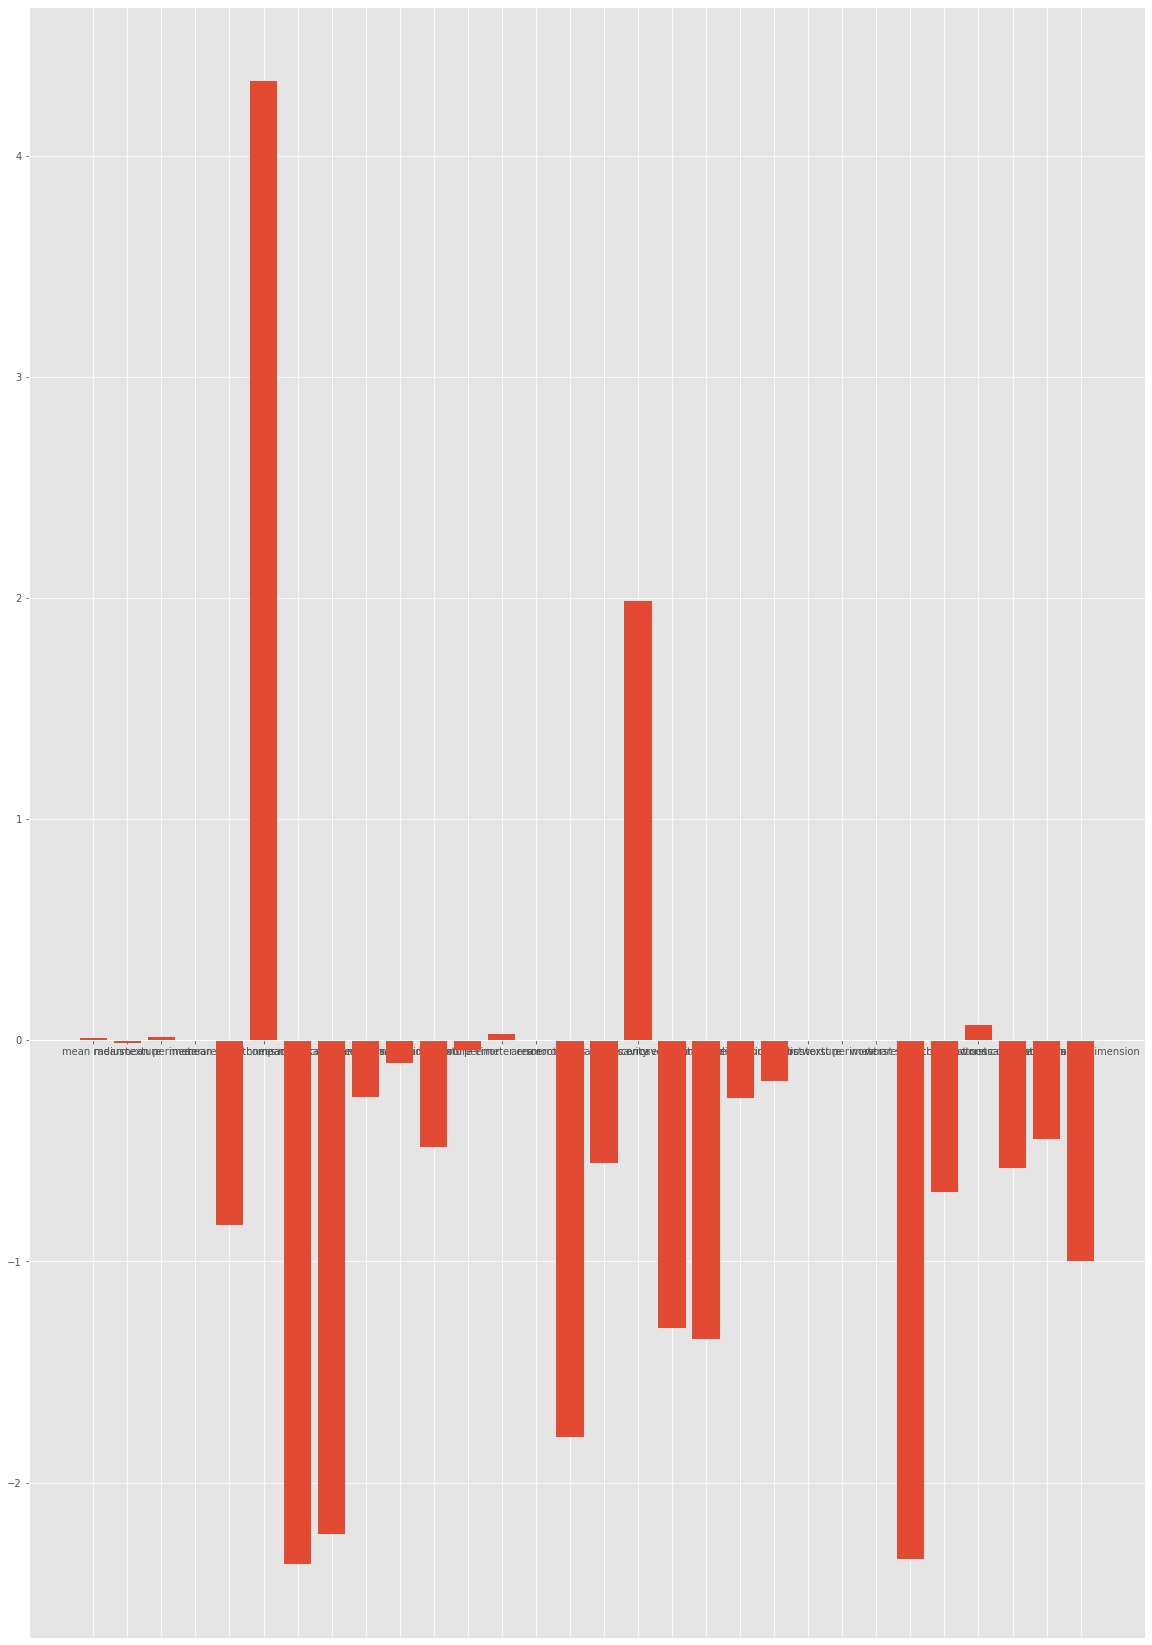

In [64]:
fig,ax = plt.subplots(figsize=(20,30))
ax.bar(ridge_coefficient['column'],ridge_coefficient['Coefficient Estimate'])
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [68]:
ridge_coef_used =np.sum(ridgeR.coef_!=0)
print("No of Features used",ridge_coef_used)

No of Features used 30


In [81]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
y_pred1=lasso.predict(X_test)
y_pred1
# Based on alpha Value the Numnber of Features is selected higher the alpha .. as the Features

array([ 0.89266739,  0.57795028,  1.06471114, -0.56774854,  0.57397026,
       -0.33734044,  0.77619515,  0.87385791,  0.85647721,  0.82457337,
        0.32242357,  0.82555264,  1.04398392,  0.70799743,  0.96254413,
        0.29706359,  1.0070892 ,  1.03847765,  0.94070835, -0.03911511,
        1.10373291,  0.95590857,  0.82969923,  0.95108064,  0.76642472,
        0.04753601,  0.72033446,  0.63747169,  0.24717291,  0.10148957,
        0.66410877,  0.81901556,  0.89760716, -0.59249726,  0.14361377,
        0.87223914,  0.83397293,  0.57809361,  1.11301191,  1.042812  ,
       -0.54988457,  0.30981129,  0.87605879,  1.12709037,  0.3908418 ,
        0.93009409,  1.28404171,  0.99883005, -0.12237717,  0.26163771,
        0.81912326,  0.42000126,  0.5274911 ,  0.92906264,  1.09344736,
        0.54883555,  0.82245447,  1.18468427,  0.51112754,  0.92751727,
        0.69660453,  0.30512456,  0.99366698,  0.16900381,  0.3119966 ,
        0.60676494, -0.25049546,  0.33477695,  0.53510326,  0.72

In [73]:
lasso.score(X_train,y_train)

0.685458647727757

In [74]:
lasso.score(X_test,y_test)

0.6706725658647283

In [86]:
from sklearn import metrics
print('MSE',metrics.mean_squared_error(y_test,y_pred1))

MSE 0.07846267588180565


In [77]:
lasso_coefficient =pd.DataFrame()
lasso_coefficient["column"]=X_train.columns
lasso_coefficient["Coefficient Estimate"]=pd.Series(lasso.coef_)
print(lasso_coefficient)

                     column  Coefficient Estimate
0               mean radius              0.000000
1              mean texture              0.005372
2            mean perimeter              0.000000
3                 mean area              0.000504
4           mean smoothness             -0.000000
5          mean compactness             -0.000000
6            mean concavity             -0.000000
7       mean concave points             -0.000000
8             mean symmetry             -0.000000
9    mean fractal dimension             -0.000000
10             radius error             -0.000000
11            texture error             -0.000000
12          perimeter error             -0.002081
13               area error             -0.000878
14         smoothness error             -0.000000
15        compactness error             -0.000000
16          concavity error             -0.000000
17     concave points error             -0.000000
18           symmetry error             -0.000000


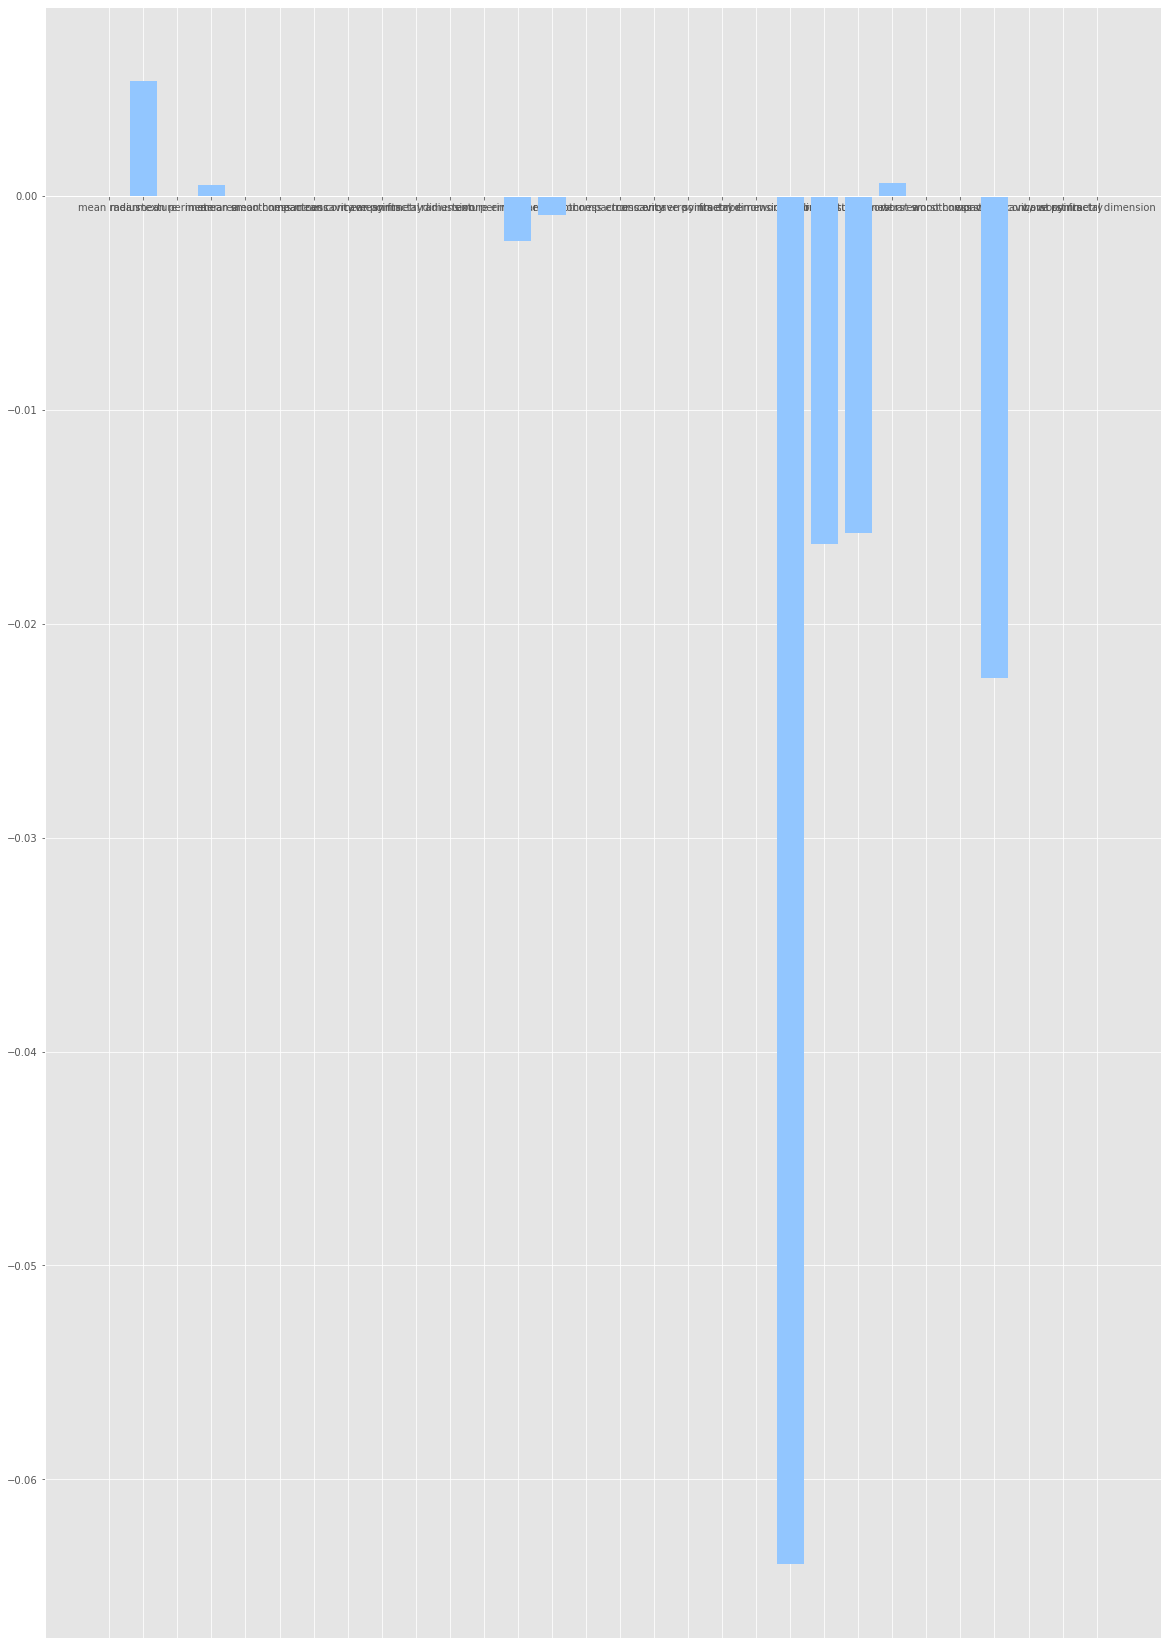

In [93]:
fig,ax = plt.subplots(figsize=(20,30))
ax.bar(lasso_coefficient['column'],lasso_coefficient['Coefficient Estimate'])
ax.spines['bottom'].set_position('zero')
plt.style.use('seaborn-pastel')
plt.show()

In [79]:
lasso_coefficient

,column,Coefficient Estimate
0,mean radius,0.000000
1,mean texture,0.005372
2,mean perimeter,0.000000
3,mean area,0.000504
4,mean smoothness,-0.000000
5,mean compactness,-0.000000
6,mean concavity,-0.000000
7,mean concave points,-0.000000
8,mean symmetry,-0.000000
9,mean fractal dimension,-0.000000


In [80]:
lasso_coef_used=np.sum(lasso.coef_!=0)
print("The No of Feature Used :",lasso_coef_used)

The No of Feature Used : 9


# ElasticNet Regression

In [87]:
from sklearn.linear_model import ElasticNet
e_net=ElasticNet(alpha=0.01,l1_ratio=0.09)
e_net.fit(X_train,y_train)
y_pred2=e_net.predict(X_test)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.892086603276269, tolerance: 0.009887323943661971
  model = cd_fast.enet_coordinate_descent(


In [83]:
e_net.score(X_train,y_train)

0.7297918139187785

In [84]:
e_net.score(X_test,y_test)

0.7187130838801314

In [88]:
from sklearn import metrics
print('MSE',metrics.mean_squared_error(y_test,y_pred2))

MSE 0.06701696197056091


In [89]:
e_net_coefficient =pd.DataFrame()
e_net_coefficient["column"]=X_train.columns
e_net_coefficient["Coefficient Estimate"]=pd.Series(e_net.coef_)
print(e_net_coefficient)

                     column  Coefficient Estimate
0               mean radius              0.187484
1              mean texture              0.003232
2            mean perimeter             -0.007317
3                 mean area             -0.000881
4           mean smoothness             -0.000000
5          mean compactness             -0.000000
6            mean concavity             -0.079128
7       mean concave points             -0.010453
8             mean symmetry             -0.000000
9    mean fractal dimension             -0.000000
10             radius error             -0.063860
11            texture error             -0.035050
12          perimeter error             -0.012848
13               area error              0.000453
14         smoothness error             -0.000000
15        compactness error              0.000000
16          concavity error              0.000000
17     concave points error             -0.000000
18           symmetry error             -0.000000


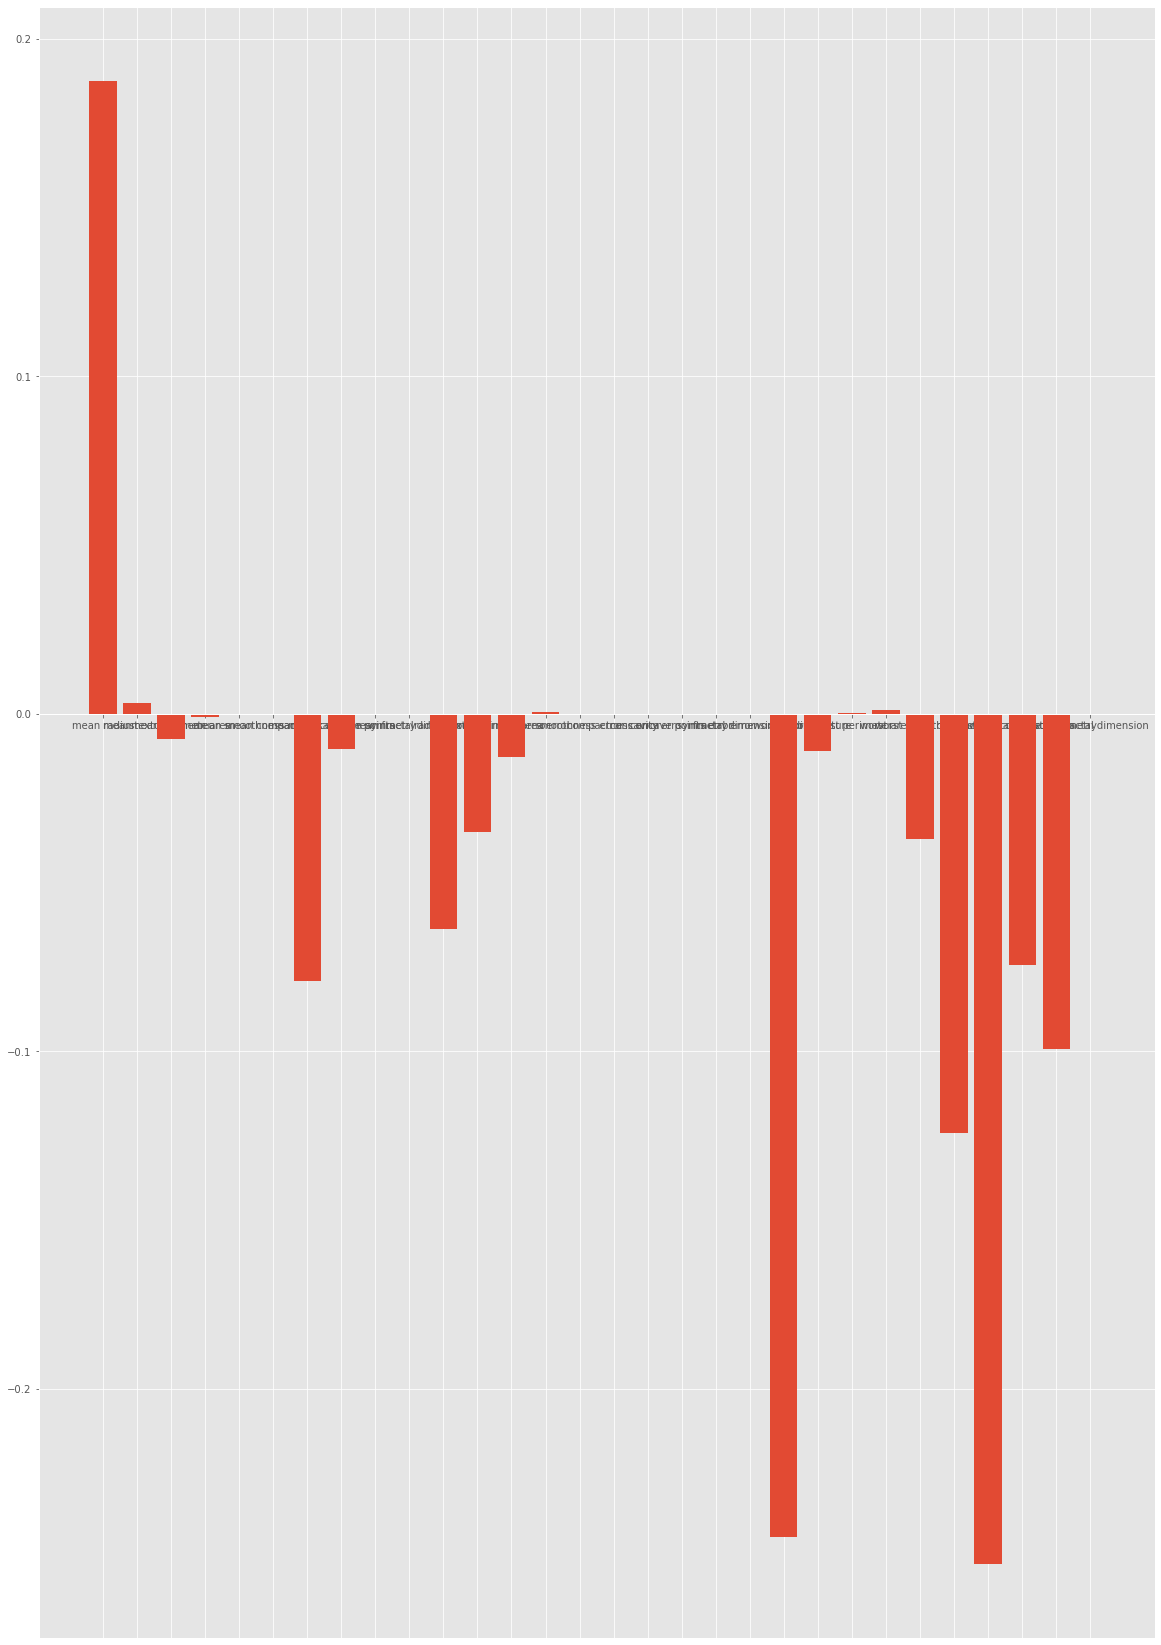

In [90]:
fig,ax = plt.subplots(figsize=(20,30))
ax.bar(lasso_coefficient['column'],e_net_coefficient['Coefficient Estimate'])
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [94]:
e_net_coef_used=np.sum(e_net.coef_!=0)
print("The No of Feature Used :",e_net_coef_used)

The No of Feature Used : 19
